# Simulated Annealing - Análise da temperatura

Author: Rosalvo Neto


**Referências** 

https://www.researchgate.net/publication/238769168_MLP_Neural_Networks_Optimization_through_Simulated_Annealing_in_a_Hybrid_Approach_for_Time_Series_Prediction

http://what-when-how.com/artificial-intelligence/a-comparison-of-cooling-schedules-for-simulated-annealing-artificial-intelligence/

https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/

https://www.sciencedirect.com/science/article/abs/pii/S1568494616304318


In [1]:
import numpy as np
from matplotlib import pyplot as plty
from math import exp

## Importância da temperatura

É o mecanismo que permite passos indiretos no início da busca. Analogia com o cozimento de vidros ou metais. Com o passar do tempo (diminuição da temperatura), este algoritmo passa a funcionar como Subida da Encosta.

- Exemplo de produção de garrafas (11s): https://www.youtube.com/watch?v=Sle_aDRAfMU 

## Mapeamento da Temperatura (Cooling Schedules)

O algoritmo utiliza um mapeamento de resfriamento de instantes de tempo (t) em temperaturas (T). Existem diversas abordagens de decaimento da temperatura pelo tempo. Nós utilizaremos a abordagem abaixo. 

In [2]:
from IPython.display import Math
Math(r'T = {\frac{To}{1 + \alpha*k}}')

<IPython.core.display.Math object>

Onde 

- T é a próxima temperatura;
- To é a temperatura inicial;
- K é a itereção.
- alfa é uma constante menor que a unidade. Seus valores usuais: [0,8 e 0,99]. 

### Fórmula de decaimento

In [3]:
def decaimentoTemperatura(To, k, alpha):
    return To/(1 + alpha*k)

## Análise gráfica do decaimento da temperatura

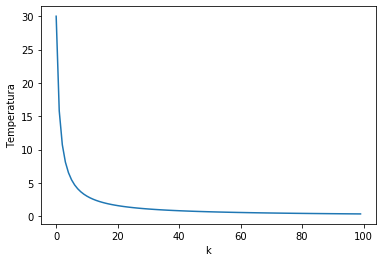

In [4]:
t_inicial = 30
max_loop  = 100
alpha     = 0.9

K = np.arange(max_loop)

temperaturas = decaimentoTemperatura(t_inicial, K, alpha)

plty.plot(K, temperaturas)
plty.xlabel('k')
plty.ylabel('Temperatura')
plty.show()

## Como usar a temperatura para aceitar passos indiretos?

É calculado uma chance de aceitar passos indiretos com base na temperatura. Essa chance é conhecida como critério de aceitação, e é baseado no algoritmo Metropolis para simulação de sistemas físicos sujeitos a uma fonte de calor. http://dx.doi.org/10.1063/1.1699114

A fórmula para calcular a chance de passos indiretos é:

In [5]:
#Chance_Passo_Indireto = exp( - Delta / t)
Math(r'Chance\_Passo\_Indireto = exp^{({\frac{-\Delta}{T}})}')

<IPython.core.display.Math object>

Onde

- Delta = função_objetivo(novo) – função_objetivo(atual)
- novo é o valor da solução candidata;
- atual é o valor da melhor solução até o momento;
- t é a temperatura atual.

A chance de aceitar passos indiretos é alta quando a temperatura e o delta também são altos, no entanto, a medida que a temperatura vai diminuindo a chance de aceitar passos indiretos também diminui, como pode ser observado na análise gráfica a seguir.

In [6]:
def getChancePassosIndireto(delta, t):
    return exp(-delta/t)

## Análise gráfica da diminuição da chance de aceitar um passo indireto

In [7]:
# Simulação da diferença entre o valor da nova solução (pior) e a solução atual
deltas = [1.5, 1, 0.5, 0.1]

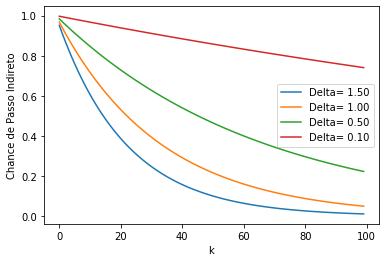

In [8]:
# Estão sendo usadas as mesmas temperaturas geradas para o gráfico anterior, 
# onde as temperaturas diminuem ao londo das iterações (k)

for d in deltas:
    chancePassoIndireto = [getChancePassosIndireto(d, t) for t in temperaturas]    
    label = 'Delta=%5.2f' % d
    plty.plot(K, chancePassoIndireto, label=label)

plty.xlabel('k')
plty.ylabel('Chance de Passo Indireto')
plty.legend()
plty.show()